<xarray.Dataset> Size: 59MB
Dimensions:              (time: 460, lat: 72, lon: 104)
Coordinates:
    number               int64 8B ...
    step                 timedelta64[ns] 8B ...
    depthBelowLandLayer  float64 8B ...
  * time                 (time) datetime64[ns] 4kB 2009-01-05 ... 2018-12-31
  * lat                  (lat) float64 576B 71.88 71.62 71.38 ... 54.38 54.12
  * lon                  (lon) float64 832B 4.125 4.375 4.625 ... 29.62 29.88
    step_of_year         (time) int64 4kB ...
Data variables:
    compound             (time, lat, lon) bool 3MB ...
    sm_percentile        (time, lat, lon) float64 28MB ...
    st_percentile        (time, lat, lon) float64 28MB ...


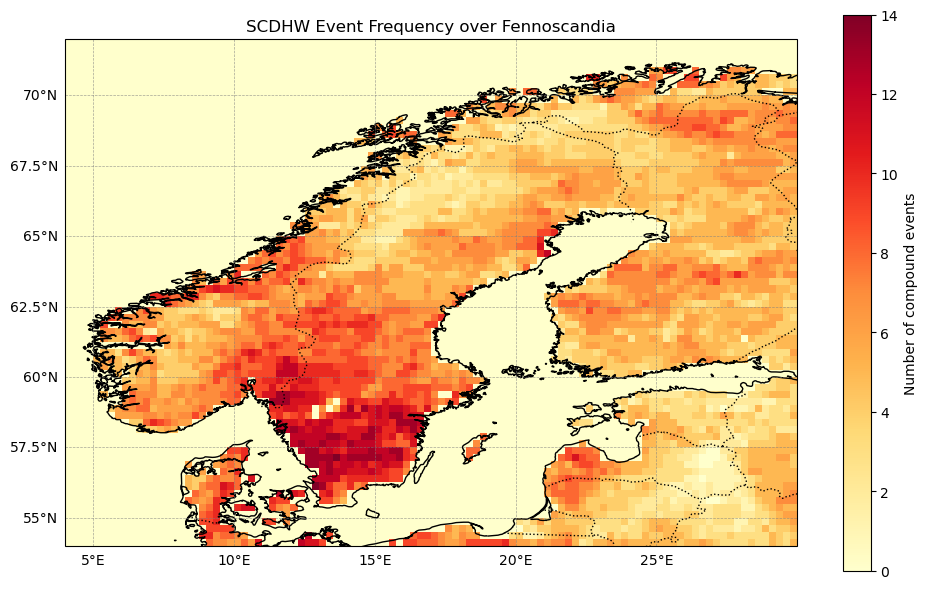

In [15]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load compound event mask
ds = xr.open_dataset("results/Compound_events_fennoscandia.nc")
print(ds)
compound = ds["compound"]  # change if your var has a different name

# Sum over time to get frequency per grid cell
frequency = compound.sum(dim="time")

# Plotting
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the frequency
frequency.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="YlOrRd",
    cbar_kwargs={"label": "Number of compound events"},
)
# Add latitude and longitude gridlines
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(),
                  linewidth=0.5, color='gray', alpha=0.7, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {"size": 10}
gl.ylabel_style = {"size": 10}

# Set title
ax.set_title("SCDHW Event Frequency over Fennoscandia", fontsize=14)


# Add map features
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.set_title("SCDHW Event Frequency over Fennoscandia")
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd 

df = pd.read_csv("results/event_summaries_fennoscandia.csv")

# Show the first few rows
print(df.head())

# Optional: show column names
print(df.columns)

   Unnamed: 0     lat     lon  start_time    end_time  duration  severity  \
0           0  70.875  24.875  2011-09-02  2011-09-10         2  0.233333   
1           1  70.875  24.875  2013-05-29  2013-06-14         3  0.300000   
2           2  70.875  24.875  2014-07-16  2014-07-16         1  0.100000   
3           3  70.875  25.125  2011-09-02  2011-09-10         2  0.200000   
4           4  70.875  25.125  2013-05-29  2013-06-14         3  0.300000   

   intensity  gpp_mean  gpp_baseline  gpp_anomaly  event_indices  
0   0.166667  0.871118      0.794038     0.077080      [122 123]  
1   0.100000  2.802472      1.237926     1.564546  [202 203 204]  
2   0.100000  1.875112      1.286406     0.588706          [254]  
3   0.133333  0.785117      0.692457     0.092660      [122 123]  
4   0.133333  2.359449      1.201359     1.158090  [202 203 204]  
Index(['Unnamed: 0', 'lat', 'lon', 'start_time', 'end_time', 'duration',
       'severity', 'intensity', 'gpp_mean', 'gpp_baseline', 'g

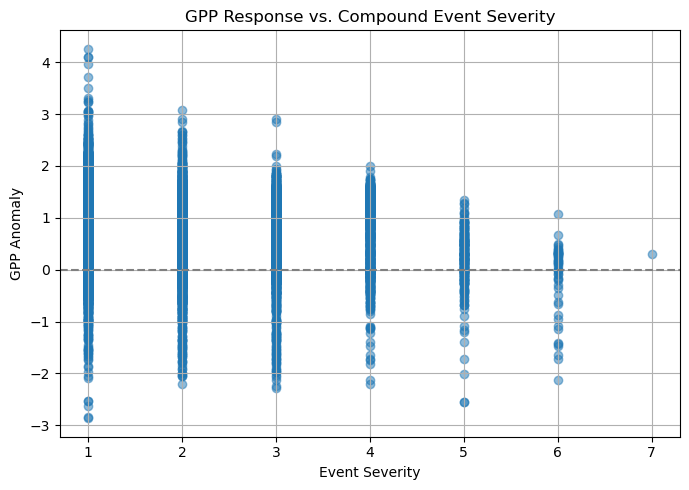

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("results/event_summaries_fennoscandia.csv")

# Plot: severity vs. GPP anomaly
plt.figure(figsize=(7, 5))
plt.scatter(df["duration"], df["gpp_anomaly"], alpha=0.5)
plt.axhline(0, color="gray", linestyle="--")
plt.xlabel("Event Severity")
plt.ylabel("GPP Anomaly")
plt.title("GPP Response vs. Compound Event Severity")
plt.grid(True)
plt.tight_layout()
plt.show()

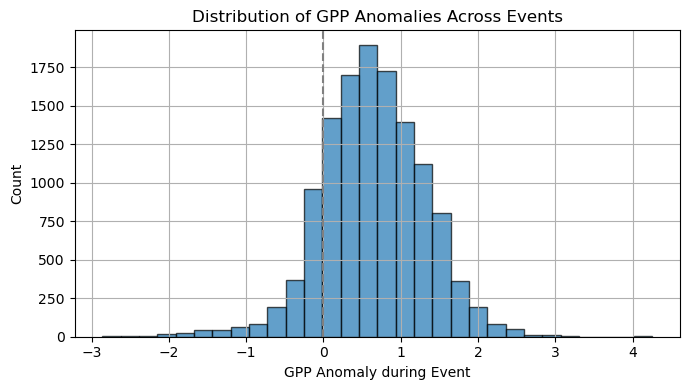

In [17]:
plt.figure(figsize=(7, 4))
plt.hist(df["gpp_anomaly"], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel("GPP Anomaly during Event")
plt.ylabel("Count")
plt.title("Distribution of GPP Anomalies Across Events")
plt.axvline(0, color="gray", linestyle="--")
plt.grid(True)
plt.tight_layout()
plt.show()

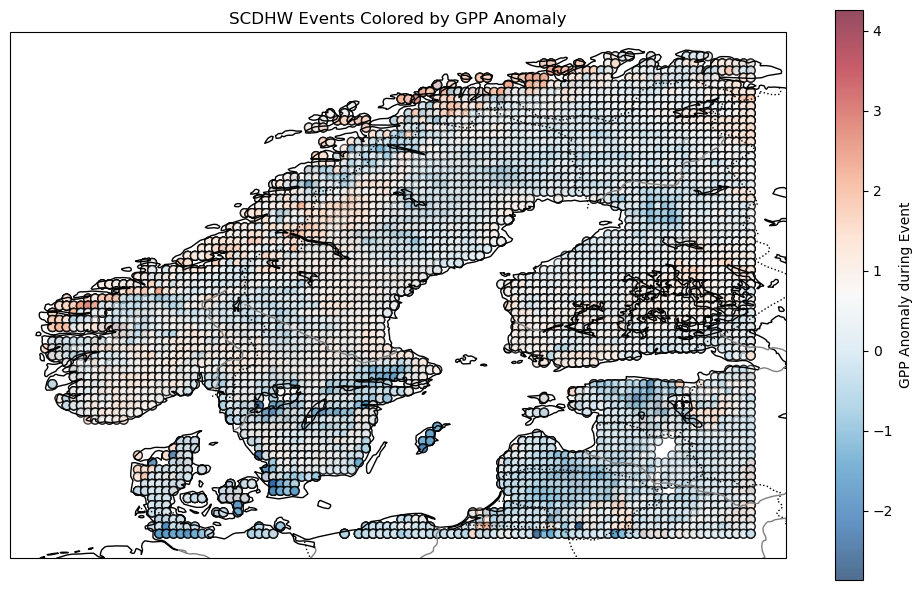

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the event summary CSV
df = pd.read_csv("results/event_summaries_fennoscandia.csv")

# Create the map plot of event GPP anomalies
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Scatter plot of events
sc = ax.scatter(
    df["lon"], df["lat"],
    c=df["gpp_anomaly"],
    cmap="RdBu_r",
    s=40,
    alpha=0.7,
    edgecolor="k",
    transform=ccrs.PlateCarree()
)

# Add map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAKES, edgecolor="black", facecolor="none")
ax.add_feature(cfeature.RIVERS, edgecolor="gray")

# Add colorbar and title
plt.colorbar(sc, ax=ax, label="GPP Anomaly during Event")
ax.set_title("SCDHW Events Colored by GPP Anomaly")

plt.tight_layout()
plt.show()


In [22]:
# Re-import necessary libraries after environment reset
import xarray as xr
import matplotlib.pyplot as plt
from scipy.stats import theilslopes

# Re-load the dataset
ds = xr.open_dataset("results/yearly_metrics_fennoscandia.nc")

# Extract time and variables
years = ds["year"].values
mean_freq = ds["frequency_per_year"].mean(dim=["latitude", "longitude"])
mean_dur = ds["duration_mean"].mean(dim=["latitude", "longitude"])
mean_sev = ds["severity_mean"].mean(dim=["latitude", "longitude"])

# Compute Sen's slope
def sen_slope(y):
    slope, intercept, _, _, _ = theilslopes(y, years)
    return slope, intercept

slope_f, int_f = sen_slope(mean_freq.values)
slope_d, int_d = sen_slope(mean_dur.values)
slope_s, int_s = sen_slope(mean_sev.values)

# Plot the results
fig, axs = plt.subplots(3, 1, figsize=(10, 9), sharex=True)

axs[0].plot(years, mean_freq, marker="o", label="Mean Frequency")
axs[0].plot(years, slope_f * years + int_f, linestyle="--", color="red", label="Sen's slope")
axs[0].set_ylabel("Frequency")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(years, mean_dur, marker="o", label="Mean Duration")
axs[1].plot(years, slope_d * years + int_d, linestyle="--", color="red", label="Sen's slope")
axs[1].set_ylabel("Duration (days)")
axs[1].legend()
axs[1].grid(True)

axs[2].plot(years, mean_sev, marker="o", label="Mean Severity")
axs[2].plot(years, slope_s * years + int_s, linestyle="--", color="red", label="Sen's slope")
axs[2].set_ylabel("Severity")
axs[2].set_xlabel("Year")
axs[2].legend()
axs[2].grid(True)

fig.suptitle("Mean Annual SCDHW Metrics over Fennoscandia\nwith Sen's Slope Trend Lines", fontsize=14)
plt.tight_layout()
plt.show()


AttributeError: 'Dataset' object has no attribute 'column'